# housekeeping

In [47]:
import os
import pandas as pd
import numpy as np

import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [5]:
%%R
library(CausalImpact)

 要求されたパッケージ bsts をロード中です 
 要求されたパッケージ BoomSpikeSlab をロード中です 
 要求されたパッケージ Boom をロード中です 

 次のパッケージを付け加えます: ‘Boom’ 

 以下のオブジェクトは ‘package:stats’ からマスクされています:

    rWishart


 次のパッケージを付け加えます: ‘BoomSpikeSlab’ 

 以下のオブジェクトは ‘package:stats’ からマスクされています:

    knots

 要求されたパッケージ zoo をロード中です 

 次のパッケージを付け加えます: ‘zoo’ 

 以下のオブジェクトは ‘package:base’ からマスクされています:

    as.Date, as.Date.numeric

 要求されたパッケージ xts をロード中です 

 次のパッケージを付け加えます: ‘bsts’ 

 以下のオブジェクトは ‘package:BoomSpikeSlab’ からマスクされています:

    SuggestBurn



In [11]:
%%R
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()


# example 1

## data generation

In [18]:
%%R
set.seed(1)

x1 <- 100 + arima.sim(model = list(ar=0.999), n = 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 10

time.points <- seq.Date(as.Date('2014-01-01'), by=1, length.out=100)
data <- zoo(cbind(y, x1), time.points)

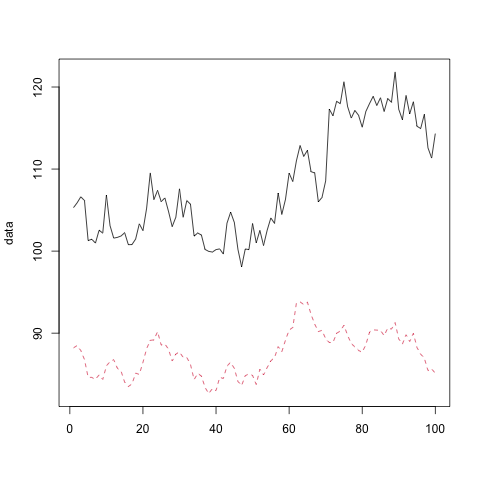

In [19]:
%%R
matplot(data, type='l')

In [20]:
%R -o data
data

array([[105.29498674,  88.21512865],
       [105.89430967,  88.48415307],
       [106.62087584,  87.87684183],
       [106.15720672,  86.77954303],
       [101.28117537,  84.62242826],
       [101.4484304 ,  84.60650277],
       [100.9735313 ,  84.36149779],
       [102.54470662,  84.91156676],
       [102.19609506,  84.36721583],
       [106.81382391,  85.9912188 ],
       [103.09714355,  86.56186733],
       [101.58238667,  86.76092794],
       [101.67355641,  85.73475871],
       [101.84135444,  85.38564191],
       [102.23745574,  84.02336568],
       [100.78481588,  83.50386958],
       [100.79947599,  83.79520042],
       [101.46929375,  85.12710077],
       [103.32375385,  84.97147786],
       [102.50175256,  86.43346003],
       [105.20297061,  88.09424007],
       [109.52962176,  89.11963726],
       [106.28138896,  89.18370886],
       [107.39078125,  90.18770236],
       [106.0348488 ,  88.53972391],
       [106.48464464,  88.69316888],
       [104.82844013,  88.03130183],
 

## analysis 1 


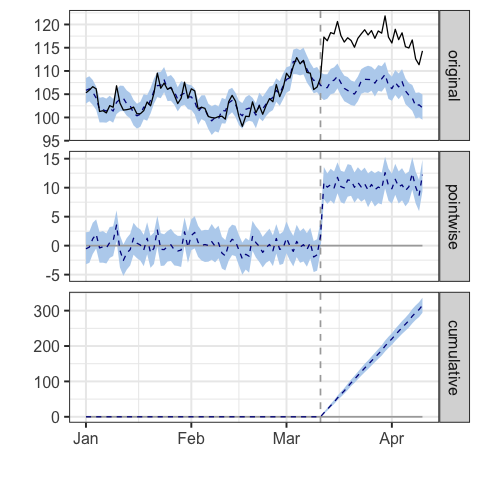

In [21]:
%%R
pre.period <- as.Date(c('2014-01-01', '2014-03-11'))
post.period <- as.Date(c('2014-03-12', '2014-04-10'))

impact <- CausalImpact(data, pre.period, post.period)

plot(impact) + theme_bw(base_size = 20)

In [22]:
%%R
summary(impact)

Posterior inference {CausalImpact}

                         Average        Cumulative  
Actual                   117            3511        
Prediction (s.d.)        107 (0.37)     3196 (10.96)
95% CI                   [106, 107]     [3175, 3217]
                                                    
Absolute effect (s.d.)   11 (0.37)      315 (10.96) 
95% CI                   [9.8, 11]      [294.0, 336]
                                                    
Relative effect (s.d.)   9.9% (0.38%)   9.9% (0.38%)
95% CI                   [9.1%, 11%]    [9.1%, 11%] 

Posterior tail-area probability p:   0.00101
Posterior prob. of a causal effect:  99.8993%

For more details, type: summary(impact, "report")



In [23]:
%%R
impact$summary

              Actual      Pred Pred.lower Pred.upper    Pred.sd AbsEffect
Average     117.0485  106.5385   105.8342   107.2486  0.3652487     10.51
Cumulative 3511.4555 3196.1555  3175.0258  3217.4571 10.9574607    315.30
           AbsEffect.lower AbsEffect.upper AbsEffect.sd  RelEffect
Average           9.799946        11.21432    0.3652487 0.09870417
Cumulative      293.998394       336.42968   10.9574607 0.09870417
           RelEffect.lower RelEffect.upper RelEffect.sd alpha           p
Average         0.09137601       0.1059612  0.003766587  0.05 0.001007049
Cumulative      0.09137601       0.1059612  0.003766587  0.05 0.001007049


## analysis 2

In [24]:
%%R
post.period <- c(71, 100)
post.period.response <- y[post.period[1]:post.period[2]]
y[post.period[1]:post.period[2]] <- NA

In [25]:
%%R
ss <- AddLocalLevel(list(), y)
bsts.model <- bsts(y ~ x1, ss, niter=1e3)

=-=-=-=-= Iteration 0 Sun Jun  4 00:10:40 2023 =-=-=-=-=
=-=-=-=-= Iteration 100 Sun Jun  4 00:10:40 2023 =-=-=-=-=
=-=-=-=-= Iteration 200 Sun Jun  4 00:10:40 2023 =-=-=-=-=
=-=-=-=-= Iteration 300 Sun Jun  4 00:10:41 2023 =-=-=-=-=
=-=-=-=-= Iteration 400 Sun Jun  4 00:10:41 2023 =-=-=-=-=
=-=-=-=-= Iteration 500 Sun Jun  4 00:10:41 2023 =-=-=-=-=
=-=-=-=-= Iteration 600 Sun Jun  4 00:10:41 2023 =-=-=-=-=
=-=-=-=-= Iteration 700 Sun Jun  4 00:10:41 2023 =-=-=-=-=
=-=-=-=-= Iteration 800 Sun Jun  4 00:10:41 2023 =-=-=-=-=
=-=-=-=-= Iteration 900 Sun Jun  4 00:10:41 2023 =-=-=-=-=


In [29]:
%%R
impact.bsts <- CausalImpact(bsts.model = bsts.model,
                            post.period.response = post.period.response,
                            alpha=0.11)

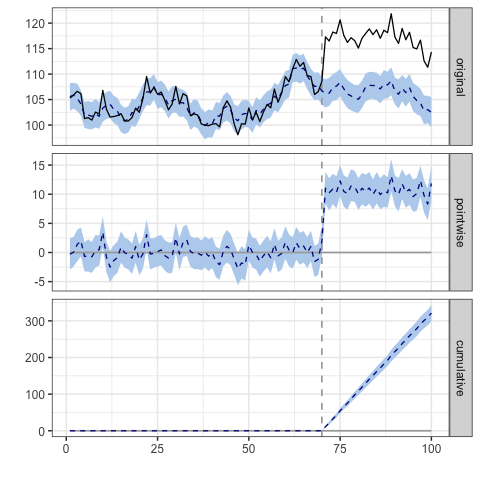

In [30]:
%%R
plot(impact.bsts)

In [31]:
%%R
summary(impact.bsts)

Posterior inference {CausalImpact}

                         Average       Cumulative  
Actual                   117           3511        
Prediction (s.d.)        106 (0.5)     3190 (14.9) 
89% CI                   [106, 107]    [3169, 3213]
                                                   
Absolute effect (s.d.)   11 (0.5)      321 (14.9)  
89% CI                   [9.9, 11]     [298.2, 343]
                                                   
Relative effect (s.d.)   10% (0.51%)   10% (0.51%) 
89% CI                   [9.3%, 11%]   [9.3%, 11%] 

Posterior tail-area probability p:   0.00102
Posterior prob. of a causal effect:  99.89796%

For more details, type: summary(impact, "report")



# example 2

## data generation

In [160]:
%%R
data(iclaims)
data <- initial.claims
data <- data.frame(data)
head(data)

           iclaimsNSA michigan.unemployment idaho.unemployment
2004-01-04      2.536                 1.488             -0.561
2004-01-11      0.882                 1.100             -0.992
2004-01-18     -0.077                 1.155             -1.212
2004-01-25      0.135                 0.530             -1.034
2004-02-01      0.373                 0.698             -1.195
2004-02-08     -0.437                 0.441             -1.386
           pennsylvania.unemployment unemployment.filing
2004-01-04                     1.773               0.909
2004-01-11                     0.900               0.148
2004-01-18                     1.477               0.210
2004-01-25                     1.244              -0.308
2004-02-01                     0.643               0.570
2004-02-08                     0.049              -0.182
           new.jersey.unemployment department.of.unemployment
2004-01-04                   2.021                      1.640
2004-01-11                   1.280  

In [161]:
%R -o data
data

,iclaimsNSA,michigan.unemployment,idaho.unemployment,pennsylvania.unemployment,unemployment.filing,new.jersey.unemployment,department.of.unemployment,illinois.unemployment,rhode.island.unemployment,unemployment.office,filing.unemployment
2004-01-04,2.536,1.488,-0.561,1.773,0.909,2.021,1.640,0.300,1.750,0.498,0.073
2004-01-11,0.882,1.100,-0.992,0.900,0.148,1.280,1.014,0.180,-0.011,0.264,0.584
2004-01-18,-0.077,1.155,-1.212,1.477,0.210,1.080,1.009,0.119,-0.028,0.031,0.448
2004-01-25,0.135,0.530,-1.034,1.244,-0.308,1.067,0.734,0.727,-0.230,-0.143,-0.269
2004-02-01,0.373,0.698,-1.195,0.643,0.570,1.125,0.502,0.598,0.625,-0.219,-1.006
...,...,...,...,...,...,...,...,...,...,...,...
2012-08-26,-0.720,-0.716,-0.312,-0.812,-0.879,0.922,-1.279,0.132,-0.540,0.369,-0.397
2012-09-02,-0.807,-0.730,-0.319,-0.808,-0.659,-0.678,-1.140,0.019,-0.386,0.256,-0.359
2012-09-09,-0.536,-0.728,-0.038,-0.758,-0.829,-0.864,-1.451,-0.110,-0.430,0.388,-0.200
2012-09-16,-0.772,-0.808,-0.264,-0.818,-0.855,-0.878,-1.460,-0.136,-0.423,0.226,-0.343


In [162]:
data.isnull().sum()

iclaimsNSA                    0
michigan.unemployment         0
idaho.unemployment            0
pennsylvania.unemployment     0
unemployment.filing           0
new.jersey.unemployment       0
department.of.unemployment    0
illinois.unemployment         0
rhode.island.unemployment     0
unemployment.office           0
filing.unemployment           0
dtype: int64

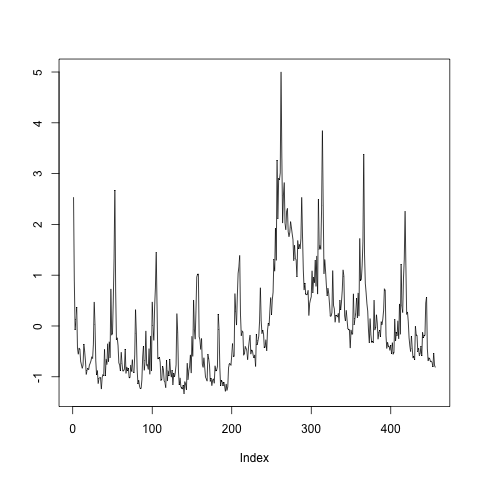

In [163]:
%%R
options(repr.plot.width=12, repr.plot.height=6)
plot(data$iclaimsNSA, ylab='', type='l')

# analysis 1

In [164]:
%%R
post.period <- c(246, dim(data)[1])
post.period.response <- data$iclaimsNSA[post.period[1]:post.period[2]]
data[post.period[1]:post.period[2], 'iclaimsNSA'] <- NA

In [165]:
%%R
model_components <- AddLocalLinearTrend(list(), data$iclaimsNSA)
model_components <- AddSeasonal(model_components, data$iclaimsNSA, nseasons=8, season.duration=53)
model_components <- AddDynamicRegression(model_components, iclaimsNSA ~ ., data=data)

In [182]:
%%R
model_components <- AddLocalLinearTrend(list(), data$iclaimsNSA)
model_components <- AddSeasonal(model_components, data$iclaimsNSA, nseasons=52)
model_components <- AddDynamicRegression(model_components, iclaimsNSA ~ ., data=data)

In [183]:
%%R
bsts.model <- bsts(data$iclaimsNSA, state.specification=model_components, niter=3e3)

=-=-=-=-= Iteration 0 Sun Jun  4 18:08:55 2023 =-=-=-=-=
=-=-=-=-= Iteration 300 Sun Jun  4 18:09:16 2023 =-=-=-=-=
=-=-=-=-= Iteration 600 Sun Jun  4 18:09:35 2023 =-=-=-=-=
=-=-=-=-= Iteration 900 Sun Jun  4 18:09:55 2023 =-=-=-=-=
=-=-=-=-= Iteration 1200 Sun Jun  4 18:10:13 2023 =-=-=-=-=
=-=-=-=-= Iteration 1500 Sun Jun  4 18:10:31 2023 =-=-=-=-=
=-=-=-=-= Iteration 1800 Sun Jun  4 18:10:50 2023 =-=-=-=-=
=-=-=-=-= Iteration 2100 Sun Jun  4 18:11:08 2023 =-=-=-=-=
=-=-=-=-= Iteration 2400 Sun Jun  4 18:11:27 2023 =-=-=-=-=
=-=-=-=-= Iteration 2700 Sun Jun  4 18:11:45 2023 =-=-=-=-=


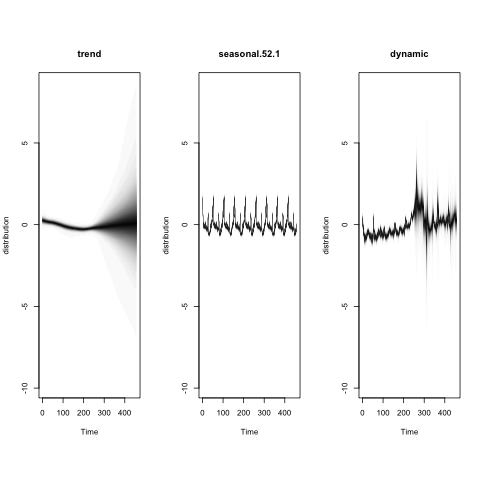

In [184]:
%%R
plot(bsts.model, 'components')

In [185]:
%%R
impact.bsts <- CausalImpact(bsts.model = bsts.model,
                            post.period.response = post.period.response,
                            alpha=0.11)

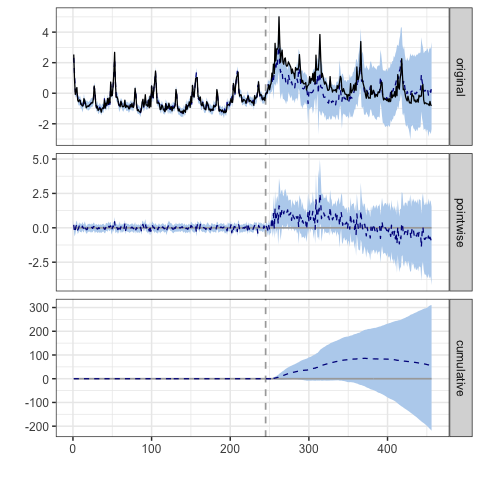

In [186]:
%%R
plot(impact.bsts)

In [187]:
%%R
summary(impact.bsts)

Posterior inference {CausalImpact}

                         Average         Cumulative      
Actual                   0.61            127.84          
Prediction (s.d.)        0.35 (0.8)      73.23 (168.6)   
89% CI                   [-0.86, 1.6]    [-182.29, 347.2]
                                                         
Absolute effect (s.d.)   0.26 (0.8)      54.61 (168.6)   
89% CI                   [-1, 1.5]       [-219, 310.1]   
                                                         
Relative effect (s.d.)   86% (3724%)     86% (3724%)     
89% CI                   [-614%, 609%]   [-614%, 609%]   

Posterior tail-area probability p:   0.35416
Posterior prob. of a causal effect:  65%

For more details, type: summary(impact, "report")



# example 3

## data generation

In [287]:
cd = os.getcwd()
fileloc = cd + '/varian/ml-data/BSTS/econ-HSN1FNSA.csv'
%R -i fileloc

In [288]:
%%R
dat <- read.csv(fileloc)

In [289]:
%%R
y <- zoo(dat[,2],as.Date(dat[,1]))
y.name <- "housing"

x <- dat[,3:ncol(dat)]

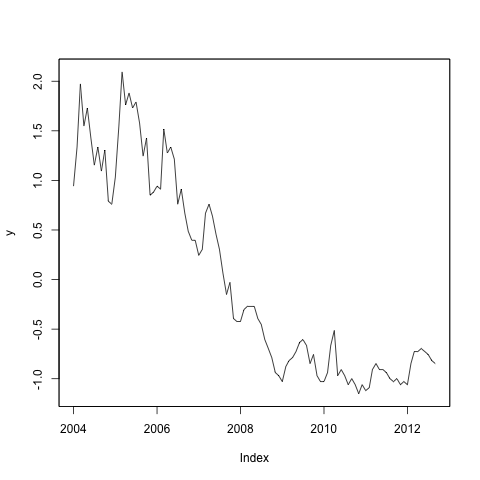

In [290]:
%%R
plot(y)

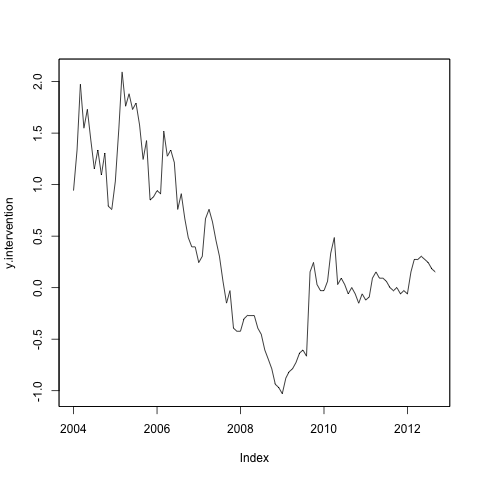

In [291]:
%%R
y.intervention <- y
y.intervention[post.period.index[1]:post.period.index[2]] <- y.intervention[post.period.index[1]:post.period.index[2]] +1
plot(y.intervention)

In [258]:
%%R
post.period.index <- c(69, nrow(dat))
post.period.response <- y[post.period.index[1]:post.period.index[2]]
y[post.period.index[1]:post.period.index[2]] <- NA

In [259]:
%%R
post.period.response <- post.period.response + 1

## analysis

In [263]:
%%R

numiter <- 4000
npred <- 5
ss <- AddLocalLinearTrend(list(),y)
ss <- AddSeasonal(ss, y, nseasons=12)
ss <- AddDynamicRegression(ss, y ~ ., data=x)
model <- bsts(y~., state.specification=ss, data=x, niter=numiter, ping=200, expected.model.size=npred, seed=123)

=-=-=-=-= Iteration 0 Sun Jun  4 20:23:57 2023 =-=-=-=-=
=-=-=-=-= Iteration 200 Sun Jun  4 20:24:08 2023 =-=-=-=-=
=-=-=-=-= Iteration 400 Sun Jun  4 20:24:17 2023 =-=-=-=-=
=-=-=-=-= Iteration 600 Sun Jun  4 20:24:25 2023 =-=-=-=-=
=-=-=-=-= Iteration 800 Sun Jun  4 20:24:34 2023 =-=-=-=-=
=-=-=-=-= Iteration 1000 Sun Jun  4 20:24:42 2023 =-=-=-=-=
=-=-=-=-= Iteration 1200 Sun Jun  4 20:24:50 2023 =-=-=-=-=
=-=-=-=-= Iteration 1400 Sun Jun  4 20:24:58 2023 =-=-=-=-=
=-=-=-=-= Iteration 1600 Sun Jun  4 20:25:06 2023 =-=-=-=-=
=-=-=-=-= Iteration 1800 Sun Jun  4 20:25:14 2023 =-=-=-=-=
=-=-=-=-= Iteration 2000 Sun Jun  4 20:25:22 2023 =-=-=-=-=
=-=-=-=-= Iteration 2200 Sun Jun  4 20:25:30 2023 =-=-=-=-=
=-=-=-=-= Iteration 2400 Sun Jun  4 20:25:38 2023 =-=-=-=-=
=-=-=-=-= Iteration 2600 Sun Jun  4 20:25:47 2023 =-=-=-=-=
=-=-=-=-= Iteration 2800 Sun Jun  4 20:25:55 2023 =-=-=-=-=
=-=-=-=-= Iteration 3000 Sun Jun  4 20:26:03 2023 =-=-=-=-=
=-=-=-=-= Iteration 3200 Sun Jun  4 20:26:11 20

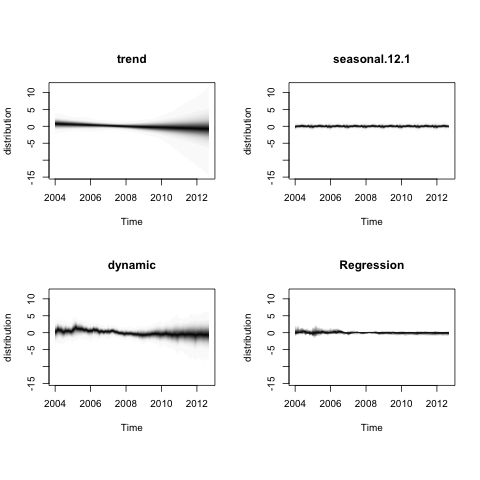

In [265]:
%%R
plot(model, 'components')

In [273]:
%%R
impact.bsts <- CausalImpact(bsts.model = model,
                            post.period.response = coredata(post.period.response),
                            alpha=0.11)

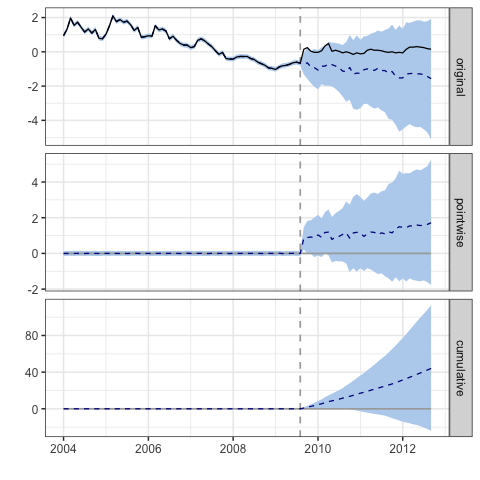

In [274]:
%%R
plot(impact.bsts)

In [277]:
%%R
summary(impact.bsts)

Posterior inference {CausalImpact}

                         Average         Cumulative     
Actual                   0.082           3.041          
Prediction (s.d.)        -1.1 (1.2)      -41.0 (43.4)   
89% CI                   [-3, 0.73]      [-110, 27.03]  
                                                        
Absolute effect (s.d.)   1.2 (1.2)       44.1 (43.4)    
89% CI                   [-0.65, 3.1]    [-23.99, 113.1]
                                                        
Relative effect (s.d.)   -36% (3801%)    -36% (3801%)   
89% CI                   [-138%, -76%]   [-138%, -76%]  

Posterior tail-area probability p:   0.13093
Posterior prob. of a causal effect:  87%

For more details, type: summary(impact, "report")



<font color=red> Relative effect の結果は、トレンド（や他の共変量の影響）を考慮せずに単に前後で lift を計算している? </font>

In [278]:
%%R
summary(impact.bsts, 'report')

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 0.082. By contrast, in the absence of an intervention, we would have expected an average response of -1.11. The 89% interval of this counterfactual prediction is [-2.98, 0.73]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 1.19 with a 89% interval of [-0.65, 3.06]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 3.04. By contrast, had the intervention not taken place, we would have expected a sum of -41.04. The 89% interval of this prediction is [-110.10, 27.03].

The above results are given in terms of absolute numbers. In relative terms, the response variable show